# Regression Analysis Assignement 

The market historical [data](https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set) of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. This is a regression problem.

Attribute Information:

The inputs are as follows
* X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* X2=the house age (unit: year)
* X3=the distance to the nearest MRT station (unit: meter)
* X4=the number of convenience stores in the living circle on foot (integer)
* X5=the geographic coordinate, latitude. (unit: degree)
* X6=the geographic coordinate, longitude. (unit: degree)

* The output,
Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

## Importing Libraries

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing dataset.

In [116]:
data = pd.read_csv('Real_Estate_valuation_data.csv')
data=data.sort_values('X2')
X = data.iloc[:, 2].values
y = data.iloc[:, 7].values

In [117]:
data.isnull().sum()

No.    0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
Y      0
dtype: int64

* The data set is randomly split into the training data set (2/3 samples) and the testing data set (1/3 samples).
* I have considered the house age and house price data for regression.

## Checking the shape of dataset.

In [118]:
data.shape

(414, 8)

In [119]:
data

,No.,X1,X2,X3,X4,X5,X6,Y
166,167,2013.417,0.0,292.99780,6,24.97744,121.54458,73.6
103,104,2012.750,0.0,208.39050,6,24.95618,121.53844,45.7
373,374,2013.083,0.0,274.01440,1,24.97480,121.53059,52.2
105,106,2012.833,0.0,292.99780,6,24.97744,121.54458,71.0
123,124,2013.417,0.0,185.42960,0,24.97110,121.53170,45.5
...,...,...,...,...,...,...,...,...
128,129,2013.083,41.3,124.99120,6,24.96674,121.54039,60.7
173,174,2013.083,41.3,401.88070,4,24.98326,121.54460,35.1
361,362,2013.083,41.4,281.20500,8,24.97345,121.54093,63.3
392,393,2013.083,42.7,443.80200,6,24.97927,121.53874,35.3


In [120]:
X.shape

(414,)

## Reshaping the array.

In [121]:
X=X.reshape(-1, 1)

In [122]:
X.shape

(414, 1)

In [123]:
y.shape

(414,)

## Splitting data into training set and test set.

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Applying the simple regression model on the training set.

In [125]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

## Predicting the test set results.

In [126]:
y_pred = lin_reg.predict(X_test)

In [127]:
y_pred

array([35.31931855, 39.29566292, 38.70126093, 35.74974758, 36.48762591,
       35.85223068, 39.3776494 , 42.08320331, 41.85774048, 38.18884542,
       36.05719688, 41.14035877, 34.04852808, 38.88573051, 35.44229827,
       40.81241284, 38.31182514, 39.29566292, 42.08320331, 39.0702001 ,
       35.58577461, 41.44780807, 35.66776109, 41.24284187, 39.41864264,
       37.73791976, 38.88573051, 38.41430824, 34.95037938, 36.44663267,
       34.99137262, 38.55778458, 40.48446691, 42.08320331, 38.14785217,
       35.36031179, 36.83606846, 39.43913926, 40.8739027 , 38.45530148,
       35.27832531, 40.7714196 , 35.79074082, 35.19633882, 36.89755832,
       39.3776494 , 38.72175755, 34.72491655, 41.11986214, 35.81123744,
       33.10568353, 42.08320331, 42.08320331, 36.34414957, 39.41864264,
       36.89755832, 35.33981517, 39.52112575, 38.59877782, 38.373315  ,
       39.00871023, 41.03787566, 39.21367644, 39.64410547, 39.50062913,
       39.0702001 , 41.28383511, 41.26333849, 41.71426414, 41.32

In [128]:
y_test

array([42. , 13. , 49.3, 12.2, 36.5, 25.9, 48.1, 37.9, 48.6, 22.3, 13.2,
       53.7, 30. , 27.3, 40.2, 31.3, 25.7, 19.2, 55.3, 22.9, 18.8, 47.7,
       20.7, 62.1, 39. , 27.7, 46.1, 22.1, 44.3, 41. , 41.2, 27.7, 38.4,
       43.5, 32.9, 38.6, 15.6, 42.5, 52.7, 37.4, 46.1, 59.5, 18.3, 41.9,
       17.7, 34.3, 24.7, 36.8, 44.8, 48.5, 42.7, 52.2, 45.7, 40.8, 39.3,
       30.6, 47.1, 34.1, 30.7, 29.7, 20.9, 28.9, 42.6, 28.4, 42.5, 30.5,
       31.7, 30.7, 27. , 41.6, 28.5, 45.5, 40.6, 34.1, 55.9, 18.3, 44.9,
       27.3, 37.4, 56.8, 50.8, 45.1, 63.2, 37.5, 51.8, 35.5, 33.1, 63.3,
       46.4, 22. , 12.8, 33.6, 58. , 35.6, 31.3, 28.8, 27. , 25.3, 42.3,
       38.2, 34.7, 47. , 53. , 39.7, 22.6, 46.2, 51.7, 70.1, 42.5, 29.3,
       42.4, 42.2, 25.7, 31.3, 49.3, 21.5, 43.1, 41.1, 40.1, 14.4, 48.2,
       40.9, 23.1, 42.9, 35.1, 37.2, 51.6, 39.7, 27.7, 20.7, 34.4, 37.5,
       23.7, 51.8, 43.9, 34.6, 42.3, 42. ])

## Visualizing the training set results.

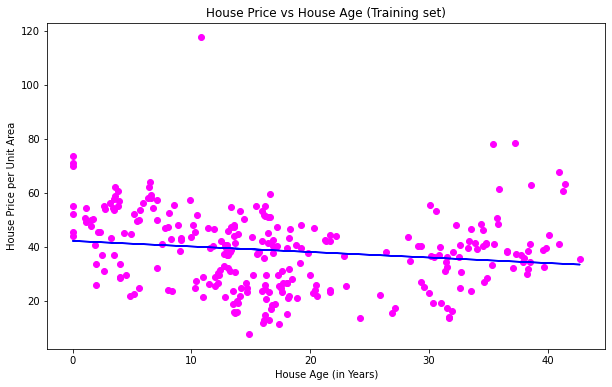

In [129]:
plt.subplots(figsize=(10,6))
plt.scatter(X_train, y_train, color = 'magenta')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('House Price vs House Age (Training set)')
plt.xlabel('House Age (in Years)')
plt.ylabel('House Price per Unit Area')
plt.show()

## Visualizing the test set results.

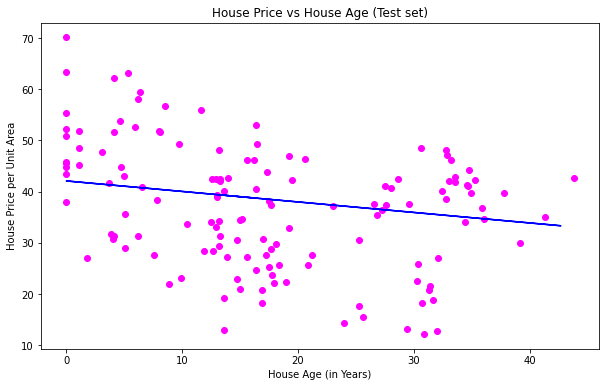

In [130]:
plt.subplots(figsize=(10,6))
plt.scatter(X_test,y_test, color = 'magenta')
plt.plot(X_train, lin_reg.predict(X_train), color = 'blue')
plt.title('House Price vs House Age (Test set)')
plt.xlabel('House Age (in Years)')
plt.ylabel('House Price per Unit Area')
plt.show()

# Training the linear regression model on the whole dataset.

In [131]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

## Visualizing the linear regression results.

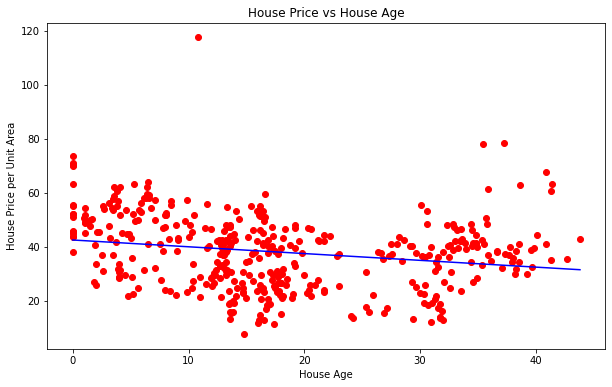

In [132]:
plt.subplots(figsize=(10,6))
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('House Price vs House Age')
plt.xlabel('House Age')
plt.ylabel('House Price per Unit Area')
plt.show()

# Another approach.
* Considering the house price per unit area and the distance to the nearest MRT station (in meters).

In [68]:
X1 = data.iloc[:, 3].values
y1 = data.iloc[:, 7].values

In [69]:
X1.shape

(414,)

In [70]:
X1=X1.reshape(-1,1)

## Splitting data into training set and test set.

In [71]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 1/3, random_state = 0)

## Applying simple regression model to the training set.

In [72]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X1_train, y1_train)

LinearRegression()

## Predicting the test set results.

In [73]:
y1_pred = lin_reg.predict(X1_test)

In [74]:
y1_pred

array([45.22921188, 15.13655516, 44.1609171 , -1.33936068, 44.05641964,
       33.58169799, 45.45505559, 45.19659623, 45.13549415, 39.02408335,
       12.79127039, 44.64040612, 43.40372002, 33.42573029, 44.59994413,
       32.05203674, 26.54332614, 15.13655516, 45.19659623, 32.08755206,
        5.28600698, 42.25547906, 33.41078239, 46.16281782, 41.09492762,
       30.21348963, 44.41814241, 33.22515866, 45.16205796, 43.63371468,
       23.46976006, 30.28280444, 45.8006526 , 44.53285839, 43.13107327,
       43.75499949, 12.72135616, 42.89782829, 45.90820288, 43.95714234,
       45.67390563, 45.90820288, 37.10974026, 43.80430659, 26.30033093,
       37.85819937, 34.27174414, 41.96746856, 43.68050798, 43.35578034,
       46.15446198, 45.19659623, 45.02455748, 43.7940064 , 42.89782829,
       34.71963426, 45.9318336 , 38.01106509, 35.45860014, 40.30916619,
       32.88694643, 34.89867193, 43.29778772, 36.39487085, 43.71416212,
       33.71957834, 30.49635341, 30.49635341, 35.67812827, 42.25

In [75]:
y1_test

array([42. , 13. , 49.3, 12.2, 36.5, 25.9, 48.1, 37.9, 48.6, 22.3, 13.2,
       53.7, 30. , 27.3, 40.2, 31.3, 25.7, 19.2, 55.3, 22.9, 18.8, 47.7,
       20.7, 62.1, 39. , 27.7, 46.1, 22.1, 44.3, 41. , 41.2, 27.7, 38.4,
       43.5, 32.9, 38.6, 15.6, 42.5, 52.7, 37.4, 46.1, 59.5, 18.3, 41.9,
       17.7, 34.3, 24.7, 36.8, 44.8, 48.5, 42.7, 52.2, 45.7, 40.8, 39.3,
       30.6, 47.1, 34.1, 30.7, 29.7, 20.9, 28.9, 42.6, 28.4, 42.5, 30.5,
       31.7, 30.7, 27. , 41.6, 28.5, 45.5, 40.6, 34.1, 55.9, 18.3, 44.9,
       27.3, 37.4, 56.8, 50.8, 45.1, 63.2, 37.5, 51.8, 35.5, 33.1, 63.3,
       46.4, 22. , 12.8, 33.6, 58. , 35.6, 31.3, 28.8, 27. , 25.3, 42.3,
       38.2, 34.7, 47. , 53. , 39.7, 22.6, 46.2, 51.7, 70.1, 42.5, 29.3,
       42.4, 42.2, 25.7, 31.3, 49.3, 21.5, 43.1, 41.1, 40.1, 14.4, 48.2,
       40.9, 23.1, 42.9, 35.1, 37.2, 51.6, 39.7, 27.7, 20.7, 34.4, 37.5,
       23.7, 51.8, 43.9, 34.6, 42.3, 42. ])

## Visualizing the training and test set results.

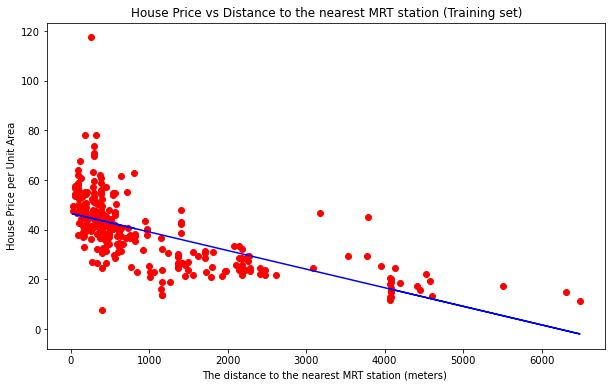

In [76]:
plt.subplots(figsize=(10,6))
plt.scatter(X1_train, y1_train, color = 'red')
plt.plot(X1_train, lin_reg.predict(X1_train), color = 'blue')
plt.title('House Price vs Distance to the nearest MRT station (Training set)')
plt.xlabel('The distance to the nearest MRT station (meters) ')
plt.ylabel('House Price per Unit Area')
plt.show()

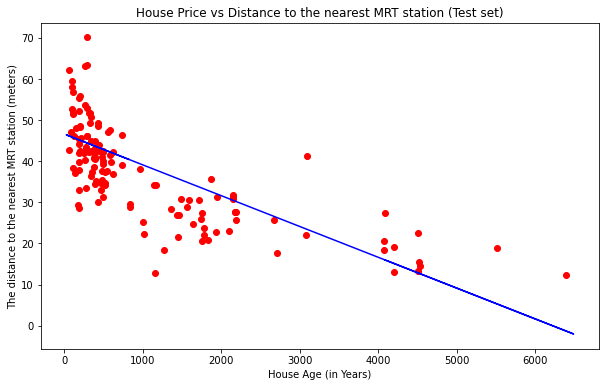

In [77]:
plt.subplots(figsize=(10,6))
plt.scatter(X1_test, y1_test, color = 'red')
plt.plot(X1_train, lin_reg.predict(X1_train), color = 'blue')
plt.title('House Price vs Distance to the nearest MRT station (Test set)')
plt.xlabel('House Age (in Years)')
plt.ylabel('The distance to the nearest MRT station (meters)')
plt.show()

# Polynomial Regression

## Training the Polynomial Regression model on the whole dataset

In [78]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_2 = PolynomialFeatures(degree = 2)
X_poly_2 = poly_reg_2.fit_transform(X)
lin_reg_2= LinearRegression()
lin_reg_2.fit(X_poly_2, y)

LinearRegression()

In [79]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_3 = PolynomialFeatures(degree = 3)
X_poly_3 = poly_reg_3.fit_transform(X)
lin_reg_3= LinearRegression()
lin_reg_3.fit(X_poly_3, y)

LinearRegression()

In [80]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg_50 = PolynomialFeatures(degree = 50)
X_poly_50 = poly_reg_50.fit_transform(X)
lin_reg_50= LinearRegression()
lin_reg_50.fit(X_poly_50, y)

LinearRegression()

## Visualizing polynomial regression results.

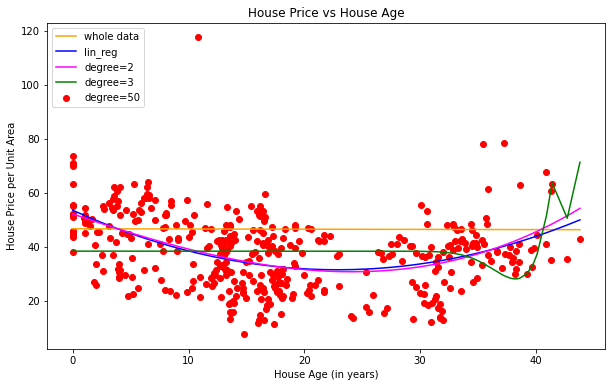

In [81]:
plt.subplots(figsize=(10,6))
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'orange')
plt.plot(X, lin_reg_2.predict(X_poly_2), color = 'blue')
plt.plot(X, lin_reg_3.predict(X_poly_3), color = 'magenta')
plt.plot(X, lin_reg_50.predict(X_poly_50), color = 'green')
plt.title('House Price vs House Age')
plt.xlabel('House Age (in years)')
plt.ylabel('House Price per Unit Area')
plt.legend(['whole data','lin_reg','degree=2', 'degree=3', 'degree=50'], loc='upper left')
plt.show()

# Logistic Regression

The [data](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) contains the heart desease dataset of the Cleveland.

In [32]:
data_log=pd.read_csv("processed_cleveland.data")
X_log = data_log.iloc[:, [0,4]].values
y_log = data_log.iloc[:, 13].values

In [33]:
data_log

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,resting_ecg,max_heart_rate,angina,oldpeak,slope,ca,thal,diagnosis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [34]:
data_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     303 non-null    float64
 1   sex                     303 non-null    float64
 2   chest_pain_type         303 non-null    float64
 3   resting_blood_pressure  303 non-null    float64
 4   cholestoral             303 non-null    float64
 5   fasting_blood_sugar     303 non-null    float64
 6   resting_ecg             303 non-null    float64
 7   max_heart_rate          303 non-null    float64
 8   angina                  303 non-null    float64
 9   oldpeak                 303 non-null    float64
 10  slope                   303 non-null    float64
 11  ca                      303 non-null    object 
 12  thal                    303 non-null    object 
 13  diagnosis               303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory

In [35]:
y_log

array([0, 2, 1, 0, 0, 0, 3, 0, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 3, 4, 0, 0, 0, 0, 3, 0, 2, 1, 0, 0, 0, 3, 1, 3, 0, 4, 0, 0, 0,
       1, 4, 0, 4, 0, 0, 0, 0, 2, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 2, 2,
       1, 0, 2, 1, 0, 3, 1, 1, 1, 0, 1, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 3, 0, 0, 0, 1, 2, 3, 0, 0, 0, 0, 0, 0, 3, 0, 2, 1, 2, 3,
       1, 1, 0, 2, 2, 0, 0, 0, 3, 2, 3, 4, 0, 3, 1, 0, 3, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 4, 3, 1, 0, 0, 1, 0, 1, 0, 1, 4, 0, 0, 0, 0, 0, 0, 4,
       3, 1, 1, 1, 2, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 1, 0, 4, 1,
       0, 1, 0, 0, 3, 2, 0, 0, 1, 0, 0, 2, 1, 2, 0, 3, 1, 2, 0, 3, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 3, 3, 3, 0, 1, 0, 4, 0, 3, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 3, 1, 0, 0, 0, 3, 2, 0, 2, 1, 0, 0, 3, 2, 1, 0, 0, 0, 0,
       0, 2, 0, 2, 2, 1, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0,
       4, 2, 2, 2, 1, 0, 1, 0, 2, 0, 1, 0, 0, 0, 1, 0, 2, 0, 3, 0, 2, 4,
       2, 0, 0, 0, 1, 0, 2, 2, 1, 0, 3, 1, 1, 2, 3,

In [36]:
y_log= np.where(y_log<2,0,1)
y_log

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,

In [37]:
X_log.shape

(303, 2)

In [38]:
y_log.shape

(303,)

## Splitting the dataset to training set and test set.

In [99]:
from sklearn.model_selection import train_test_split
X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size = 1/3, random_state = 0)

In [102]:
y_log_test.sum()

28

In [91]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_log_train = sc.fit_transform(X_log_train)
X_log_test = sc.transform(X_log_test)

## Training the Logistic Regression model on training data set.

In [41]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_log_train, y_log_train)

LogisticRegression(random_state=0)

## Predicting the test set results.

In [42]:
y_log_pred = classifier.predict(X_log_test)

## Visualization of training set results.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


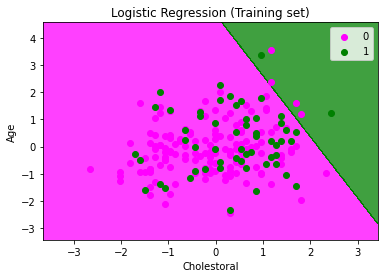

In [43]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_log_train, y_log_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Cholestoral')
plt.ylabel('Age')
plt.legend()
plt.show()

## Visualization of test set results.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


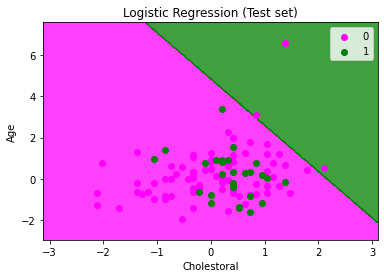

In [44]:
from matplotlib.colors import ListedColormap
X_set, y_set = X_log_test, y_log_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'green'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Cholestoral')
plt.ylabel('Age')
plt.legend()
plt.show()

## Confusion Matrix

* A confusion matrix is a table that describes the performance of a classification model on a set of test data for which the actual labels are known.

[[70  3]
 [28  0]]


Text(33.0, 0.5, 'Actual classes')

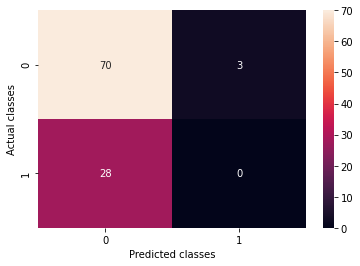

In [103]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_log_test,y_log_pred)
print(cm)
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted classes')
plt.ylabel('Actual classes')

## Accuracy of the model

In [111]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_log_test.flatten(),y_log_pred)
#parameters = classifier.coef_
print(accuracy)

0.693069306930693


# Regularized Regression methods.
* Regularized machine learning model, is a model that its loss function contains another element that should be minimized.

## Ridge and Lasso Regression

* Ridge and Lasso regression are the simple techniques which reduce the model complexity and prevent over-fitting which may result from simple linear regression.
* Ridge regression is an extension for linear regression. It’s basically a regularized linear regression model.
* Ridge Loss function, $L = ∑{( Ŷi- Yi)}^2 + α∑{β}^2$
* In ridge regression, the cost function is altered by adding a penalty equivalent to square of the magnitude of the coefficients.
* Ridge regression shrinks the coefficients and helps to reduce the model complexity and multi-collinearity.
* Lower the constraint (low alpha) on the features, the model will resemble linear regression model.

In [208]:
from sklearn.linear_model import LinearRegression, Ridge

data = pd.read_csv('Real_Estate_valuation_data.csv')
X_rid = pd.DataFrame(data, columns=['X1','X2','X3','X4'])
y_rid = data.iloc[:, 7].values

## Standardize and train/test set splitting.

In [209]:
from sklearn import preprocessing

X_rid = preprocessing.scale(X_rid)
X_rid_train, X_rid_test, y_rid_train, y_rid_test = train_test_split(
   X_rid, y_rid, test_size=0.3, random_state=0)

## Training the model.
* The model is completely biased (alpha=0).

In [210]:
ridge_reg = Ridge(alpha=0)
ridge_reg.fit(X_rid_train, y_rid_train)

Ridge(alpha=0)

In [211]:
ridge_df = pd.DataFrame({'variable': ['X1','X2','X3','X4']})
ridge_df

,variable
0,X1
1,X2
2,X3
3,X4


In [212]:
for alpha in range(0,200,1):
    # training
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_rid_train, y_rid_train)
    col_name = 'estimate' + str(alpha)
    ridge_df[col_name] = ridge_reg.coef_

ridge_df

,variable,estimate0,estimate1,estimate2,estimate3,estimate4,estimate5,estimate6,estimate7,estimate8,...,estimate190,estimate191,estimate192,estimate193,estimate194,estimate195,estimate196,estimate197,estimate198,estimate199
0,X1,1.714988,1.707013,1.699120,1.691306,1.683571,1.675912,1.668329,1.660820,1.653384,...,0.915314,0.913053,0.910803,0.908564,0.906335,0.904117,0.901910,0.899713,0.897526,0.895350
1,X2,-2.949190,-2.940313,-2.931482,-2.922696,-2.913956,-2.905260,-2.896610,-2.888005,-2.879444,...,-1.856201,-1.852563,-1.848939,-1.845329,-1.841733,-1.838151,-1.834583,-1.831029,-1.827489,-1.823962
2,X3,-7.255186,-7.226113,-7.197412,-7.169073,-7.141087,-7.113446,-7.086143,-7.059168,-7.032515,...,-4.488334,-4.480253,-4.472206,-4.464191,-4.456209,-4.448259,-4.440341,-4.432455,-4.424601,-4.416778
3,X4,3.281976,3.288696,3.295138,3.301309,3.307218,3.312873,3.318281,3.323450,3.328386,...,3.010077,3.006782,3.003489,3.000197,2.996906,2.993618,2.990331,2.987046,2.983762,2.980481


In [213]:
ridge_df = ridge_df.set_index('variable').T.rename_axis('estimate').reset_index()
ridge_df

variable,estimate,X1,X2,X3,X4
0,estimate0,1.714988,-2.949190,-7.255186,3.281976
1,estimate1,1.707013,-2.940313,-7.226113,3.288696
2,estimate2,1.699120,-2.931482,-7.197412,3.295138
3,estimate3,1.691306,-2.922696,-7.169073,3.301309
4,estimate4,1.683571,-2.913956,-7.141087,3.307218
...,...,...,...,...,...
195,estimate195,0.904117,-1.838151,-4.448259,2.993618
196,estimate196,0.901910,-1.834583,-4.440341,2.990331
197,estimate197,0.899713,-1.831029,-4.432455,2.987046
198,estimate198,0.897526,-1.827489,-4.424601,2.983762


In [219]:
ridge_df.describe()

variable,X1,X2,X3,X4
count,200.000000,200.000000,200.000000,200.000000
mean,1.218259,-2.299983,-5.533778,3.250890
std,0.231461,0.323270,0.794093,0.129597
min,0.895350,-2.949190,-7.255186,2.980481
25%,1.017655,-2.559316,-6.134957,3.144382
50%,1.177291,-2.256964,-5.396676,3.291376
75%,1.395165,-2.017630,-4.848894,3.368213
max,1.714988,-1.823962,-4.416778,3.396014


## Ploting betas with alphas.

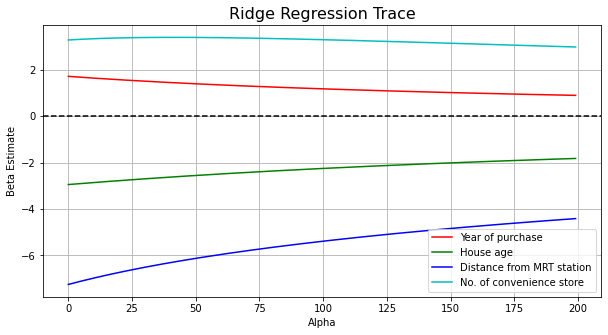

In [266]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ridge_df.X1, 'r', ridge_df.X2, 'g', ridge_df.X3, 'b', ridge_df.X4, 'c')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Alpha")
ax.set_ylabel("Beta Estimate")
ax.set_title("Ridge Regression Trace", fontsize=16)
ax.legend(labels=['Year of purchase','House age','Distance from MRT station','No. of convenience store'])
ax.grid(True)

Conclusion:
*  We see 'The number of convenience store' line does not quite shrink as alpha increases. Thus, in this model 'The number of convenience store' seems to be the most significant feature.

## Lasso Model

In [267]:
from sklearn.linear_model import Lasso
data = pd.read_csv('Real_Estate_valuation_data.csv')
X_lasso = pd.DataFrame(data, columns=['X1','X2','X3','X4'])
y_lasso = data.iloc[:, 7].values

In [268]:
from sklearn import preprocessing

X_lasso= preprocessing.scale(X_lasso)
X_lasso_train, X_lasso_test, y_lasso_train, y_lasso_test = train_test_split(
   X_lasso, y_lasso, test_size=0.3, random_state=0)

In [269]:
lasso_df = pd.DataFrame({'variable': ['X1','X2','X3','X4']})
lasso_df

,variable
0,X1
1,X2
2,X3
3,X4


In [270]:
for alpha in np.arange(0.0,10.0,1.0):
    # training
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_lasso_train, y_lasso_train)
    col_name =  str(alpha)
    lasso_df[col_name] = lasso_reg.coef_

lasso_df

/home/smruti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  after removing the cwd from sys.path.
/home/smruti/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/home/smruti/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12353.505324152655, tolerance: 5.503906110726644
  positive)


,variable,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
0,X1,1.714988,0.682897,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,X2,-2.949190,-1.997716,-1.035167,-0.050870,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
2,X3,-7.255186,-6.593771,-5.975409,-5.442123,-4.851623,-4.257889,-3.319998,-2.332505,-1.345012,-0.357518
3,X4,3.281976,2.677149,2.048285,1.371859,0.725734,0.081333,0.000000,0.000000,0.000000,0.000000


In [271]:
lasso_df = lasso_df.set_index('variable').T.rename_axis('estimate')
lasso_df

variable,X1,X2,X3,X4
estimate,,,,
0.0,1.714988,-2.949190,-7.255186,3.281976
1.0,0.682897,-1.997716,-6.593771,2.677149
2.0,0.000000,-1.035167,-5.975409,2.048285
3.0,0.000000,-0.050870,-5.442123,1.371859
4.0,0.000000,-0.000000,-4.851623,0.725734
5.0,0.000000,-0.000000,-4.257889,0.081333
6.0,0.000000,-0.000000,-3.319998,0.000000
7.0,0.000000,-0.000000,-2.332505,0.000000
8.0,0.000000,-0.000000,-1.345012,0.000000


In [272]:
lasso_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 0.0 to 9.0
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      10 non-null     float64
 1   X2      10 non-null     float64
 2   X3      10 non-null     float64
 3   X4      10 non-null     float64
dtypes: float64(4)
memory usage: 400.0+ bytes


In [273]:
lasso_df.describe()

variable,X1,X2,X3,X4
count,10.000000,10.000000,10.000000,10.000000
mean,0.239788,-0.603294,-4.173103,1.018634
std,0.561006,1.060561,2.293894,1.254907
min,0.000000,-2.949190,-7.255186,0.000000
25%,0.000000,-0.789093,-5.842088,0.000000
50%,0.000000,-0.000000,-4.554756,0.403534
75%,0.000000,-0.000000,-2.579378,1.879179
max,1.714988,-0.000000,-0.357518,3.281976


## Plotting beta estimate with alphas.

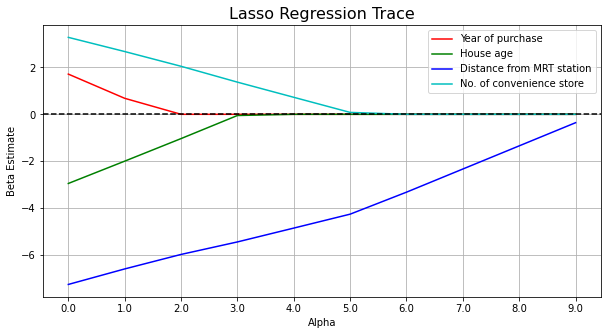

In [274]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(lasso_df.X1, 'r', lasso_df.X2, 'g', lasso_df.X3, 'b', lasso_df.X4, 'c')
ax.axhline(y=0, color='black', linestyle='--')
ax.set_xlabel("Alpha")
ax.set_ylabel("Beta Estimate")
ax.set_title("Lasso Regression Trace", fontsize=16)
ax.legend(labels=['Year of purchase','House age','Distance from MRT station','No. of convenience store'])
ax.grid(True)

* Ridge regression enforces the feature coefficients to be lower, but it does not enforce them to be zero. 
  i.e. it will not get rid of irrelevant features but minimize their impact on the trained model. But, Lasso regression can lead to feature selection.
* Lasso Loss function is of the form, $ L = ∑{( Ŷi- Yi)}^2 + α∑|β|$.

# Robust Regression
* Robust regression is interested in fitting a regression model in the presence of corrupt data: either outliers, or error in the model.
* Three techniques supported by scikit - RANSAC, Theil Sen and HuberRegressor